In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("/content/Q4_ADX_Sample_data.csv")
data

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392
...,...,...,...,...,...,...,...,...,...,...
47930,2022-10-22,14,95674771,22770341049,El Salvador,34,34,21,4,0.022347
47931,2022-10-22,14,95674771,22770341430,Jordan,34,34,21,0,0.011894
47932,2022-10-22,14,95674771,22770341430,Somalia,46,46,21,2,0.003189
47933,2022-10-22,14,95674771,22770341598,Portugal,21,21,21,5,0.159408


In [ ]:
# Calculate show-rate
data['show_rate'] = data['ae_impressions'] / data['ae_responses']

# Calculate click-rate
data['click_rate'] = data['ae_clicks'] / data['ae_impressions']

In [ ]:
data.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738,0.944444,0.000000
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384,0.958333,0.000000
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878,0.923077,0.022831
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836,0.758545,0.194767
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392,0.543554,0.128205


In [ ]:
data.groupby(["date","app_id"])['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show_rate', 'click_rate'].mean()

<ipython-input-19-e17ce6711a90>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(["date","app_id"])['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show_rate', 'click_rate'].mean()


requests  ae_impressions  ae_clicks  ae_revenue  \
date       app_id                                                        
2022-10-01 22693095  876.402817      298.901408  31.180282    3.686127   
           25596802   27.040000       23.320000   2.480000    0.879253   
           40931528  459.860000      190.450000  21.130000    1.805613   
           43840611  635.153333      247.753333   6.466667    1.033377   
           47862278  371.041985      218.958015   1.776718    0.256968   
...                         ...             ...        ...         ...   
2022-10-31 25596802   69.625000       57.464286   5.839286    3.414529   
           43840611  532.640884      193.618785   5.696133    0.813305   
           47862278  407.143434      243.363636   1.654545    0.224343   
           84650721  172.101449      133.847826  16.144928    0.532433   
           95674771  210.995122      132.585366   6.131707    0.405729   

                     show_rate  click_rate  
date       app_id                           
2022-10-01 22693095   0.489059    0.117700  
           25596802   0.891168    0.103233  
           40931528   0.444121    0.130737  
           43840611   0.389286    0.038514  
           47862278   0.637801    0.012926  
...                        ...         ...  
2022-10-31 25596802   0.865692    0.095046  
           43840611   0.382832    0.032303  
           47862278   0.654037    0.010640  
           84650721   0.786603    0.138500  
           95674771   0.694229    0.059974  

[247 rows x 6 columns]

In [ ]:
data.info()

In [ ]:
df=data.copy()

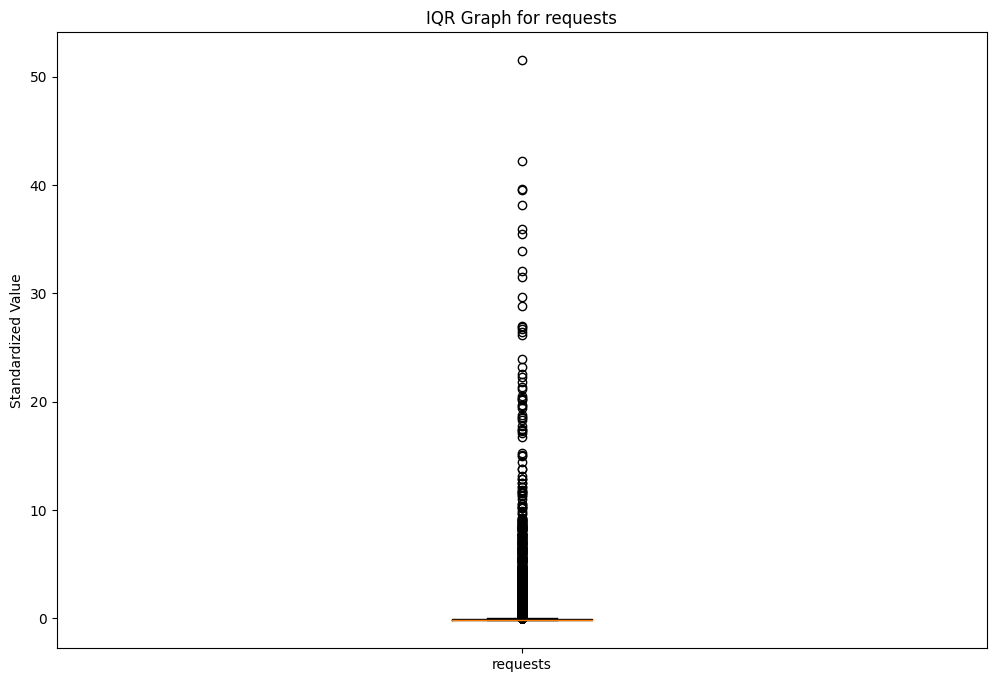

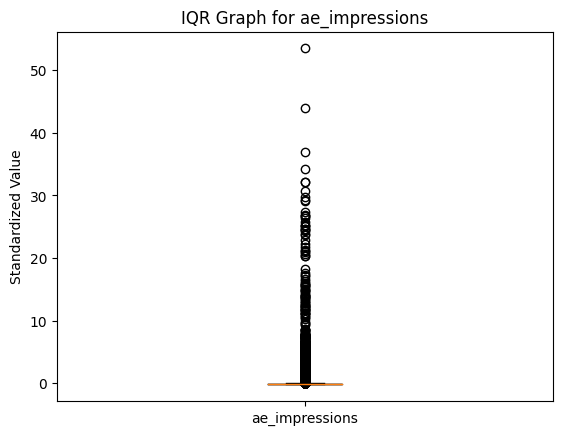

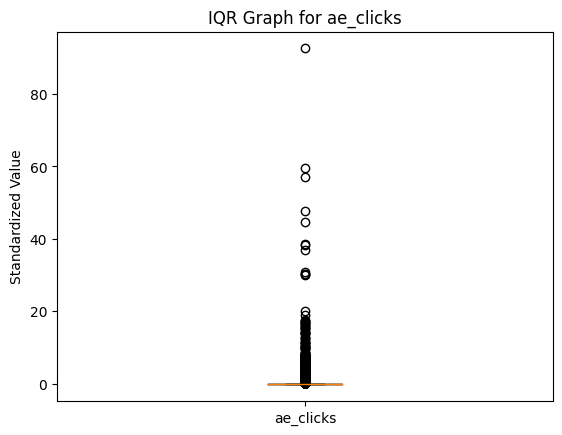

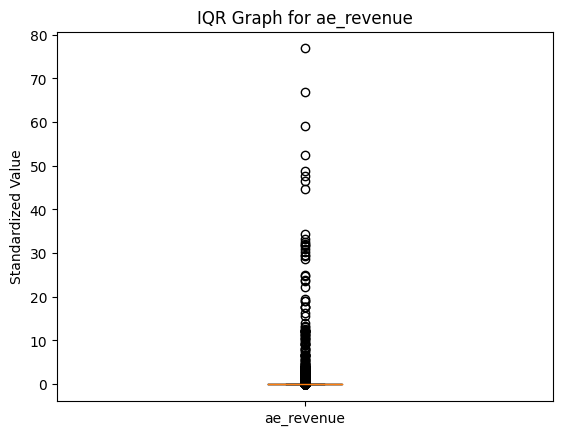

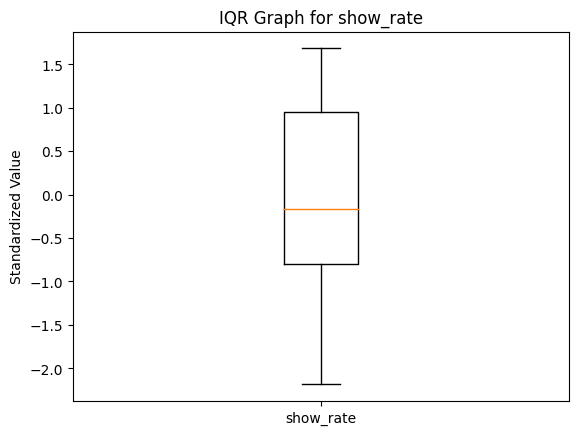

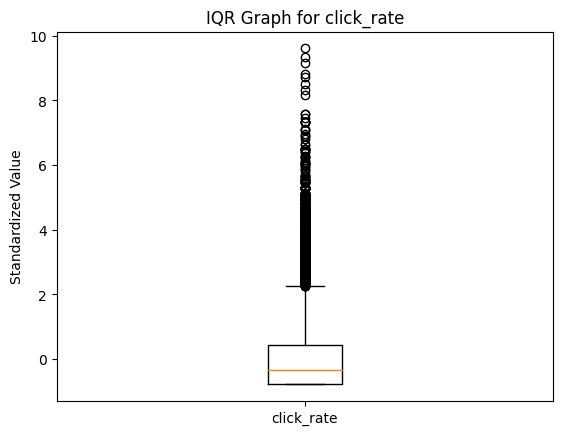

TypeError: ignored

In [ ]:
# Select the features for anomaly detection
features = ['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show_rate', 'click_rate']

for feature in features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

# Calculate the IQR for each feature
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers using IQR
outliers = ((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)

# Count anomalies for each column
anomaly_counts = outliers.sum()

# Plot IQR graph for each feature
plt.figure(figsize=(12, 8))
for feature in features:
    plt.boxplot(df[feature])
    plt.title(f'IQR Graph for {feature}')
    plt.ylabel('Standardized Value')
    plt.xticks(ticks=[1], labels=[feature])
    plt.show()

# Print anomaly counts
for feature, count in zip(features, anomaly_counts):
    print(f'Anomaly count for {feature}: {count}')



In [ ]:

# Statistical Analysis
metrics = ['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show_rate', 'click_rate']
anomaly_threshold = 3.0

for metric in metrics:
    mean = data[metric].mean()
    std = data[metric].std()
    data[metric + '_z_score'] = (data[metric] - mean) / std
    data[metric + '_anomaly'] = np.abs(data[metric + '_z_score']) > anomaly_threshold


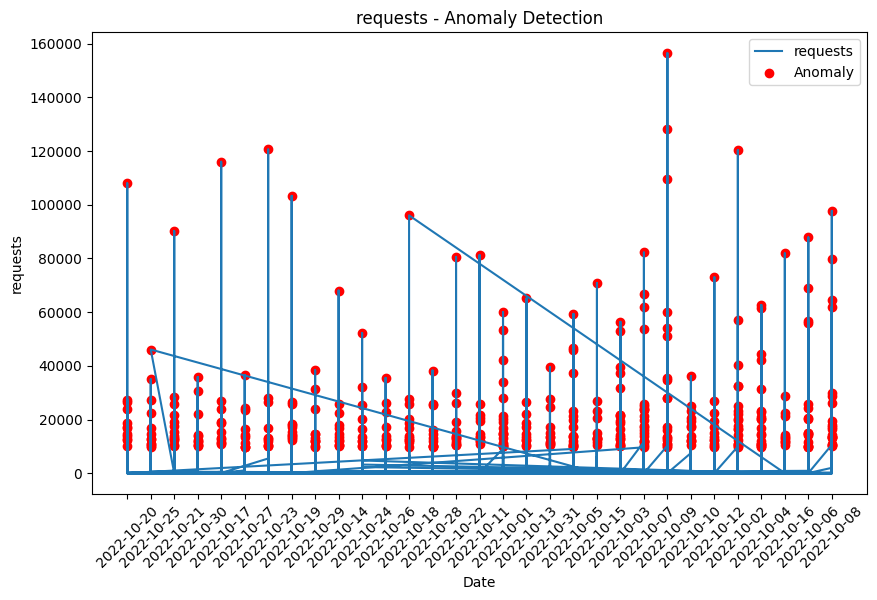

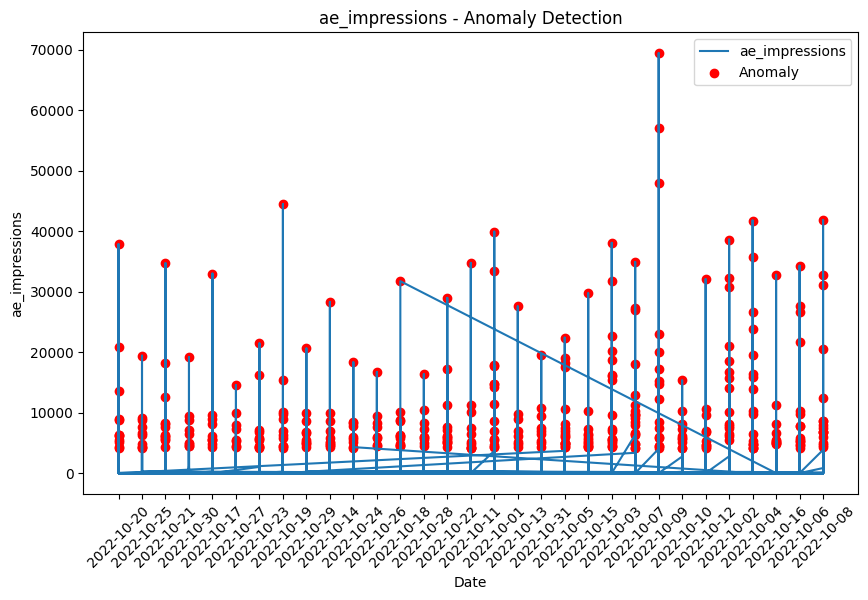

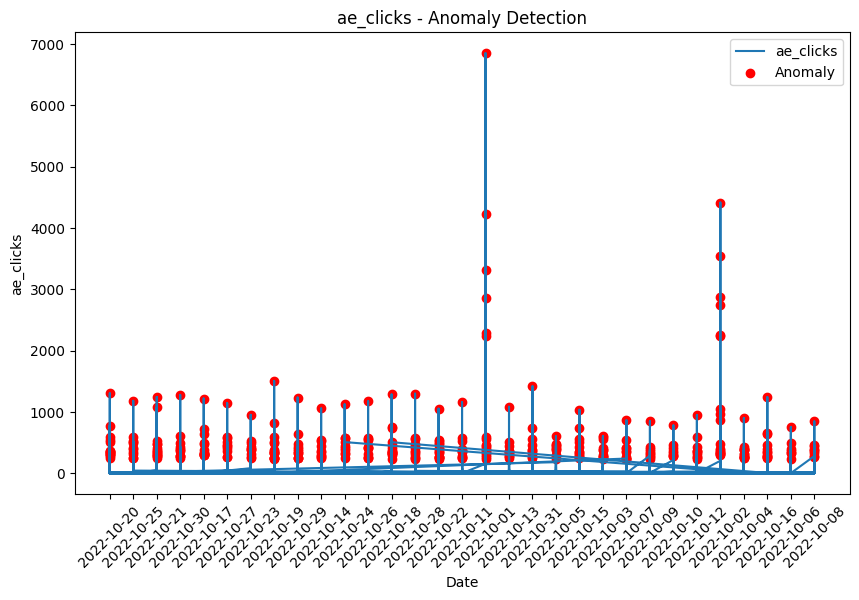

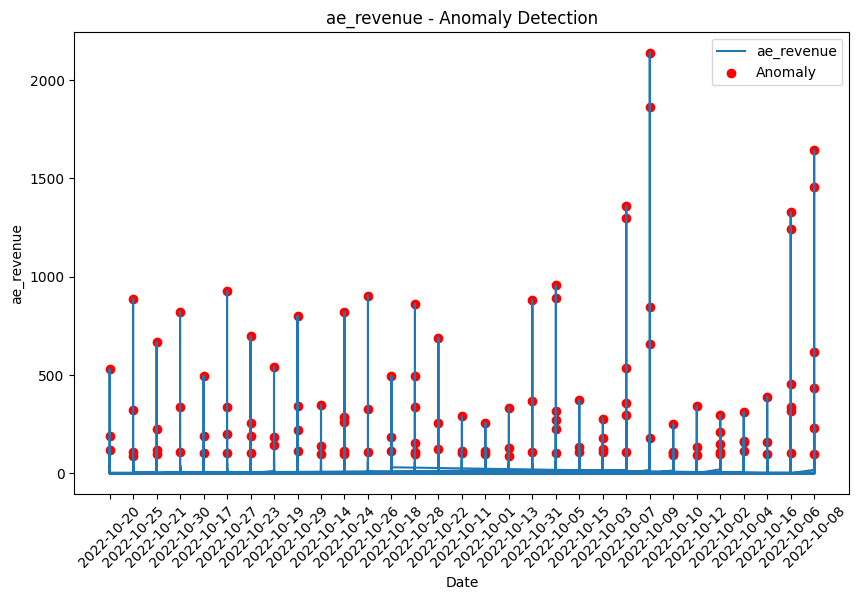

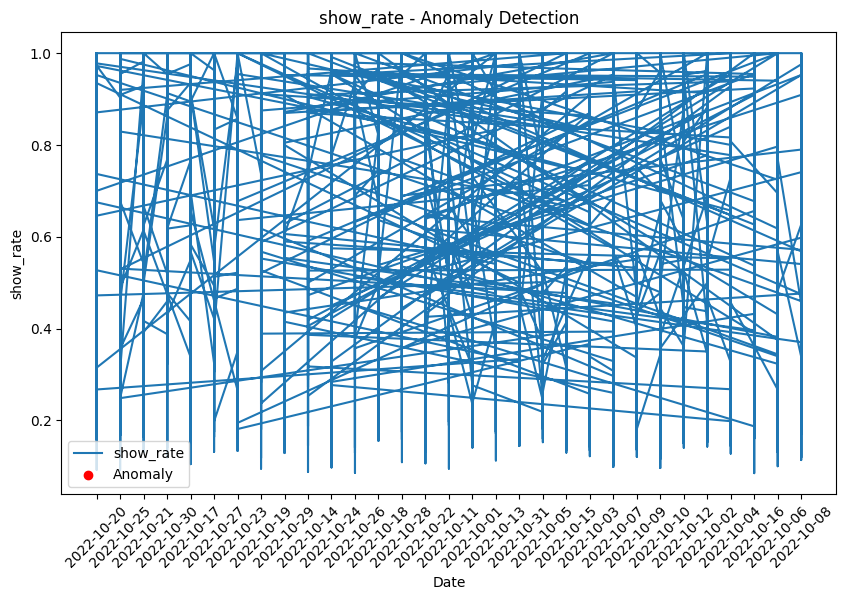

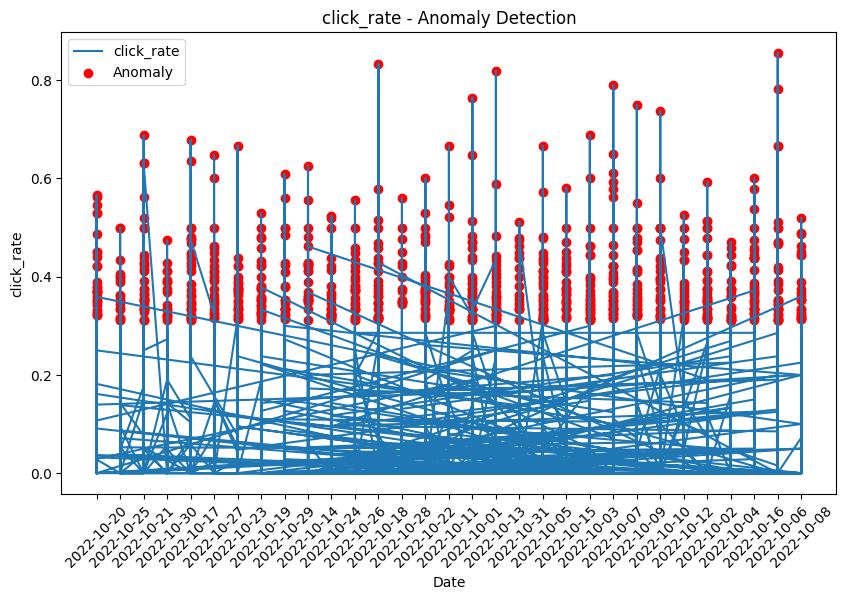

In [ ]:
# Visualization
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(data['date'], data[metric], label=metric)
    plt.scatter(data[data[metric + '_anomaly']]['date'], data[data[metric + '_anomaly']][metric], color='red', label='Anomaly')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'{metric} - Anomaly Detection')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

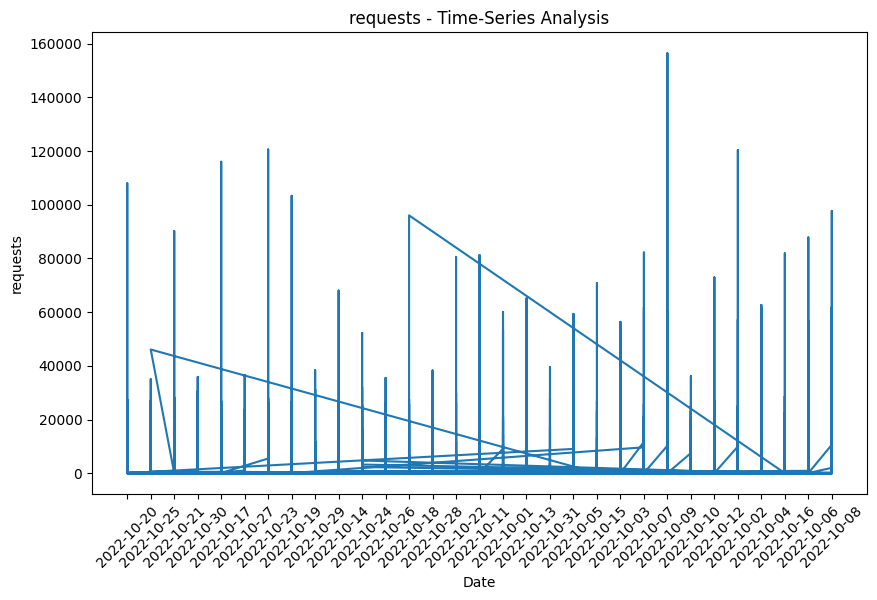

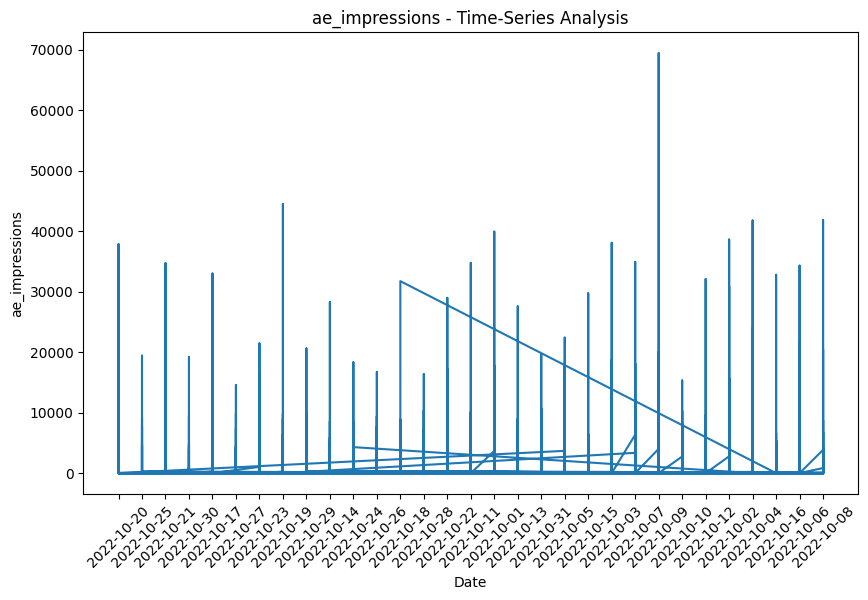

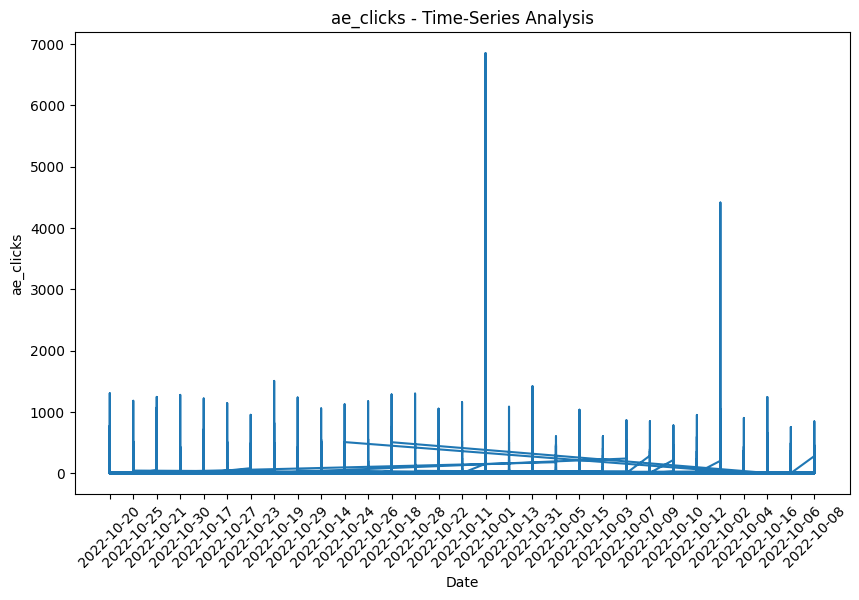

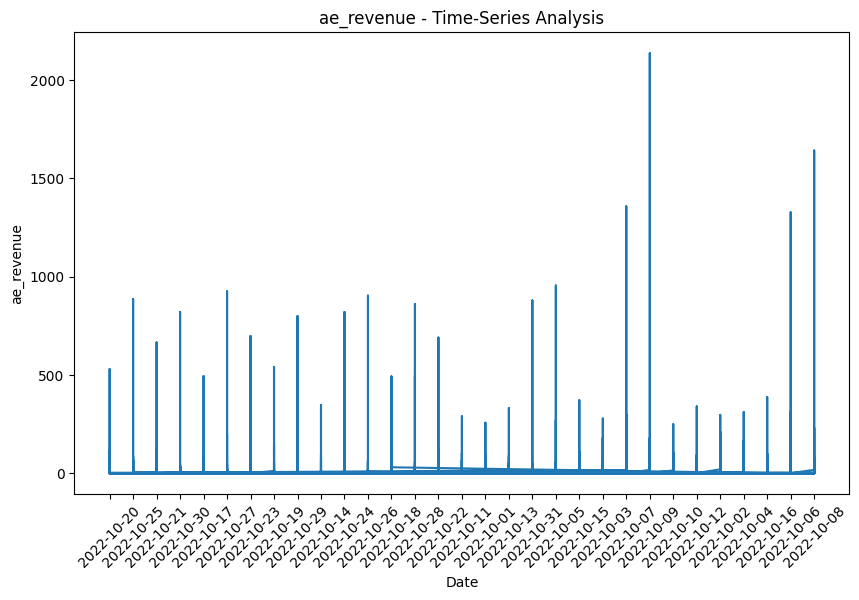

In [ ]:
# Time-Series Analysis
time_metrics = ['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue']
for metric in time_metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(data['date'], data[metric])
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'{metric} - Time-Series Analysis')
    plt.xticks(rotation=45)
    plt.show()


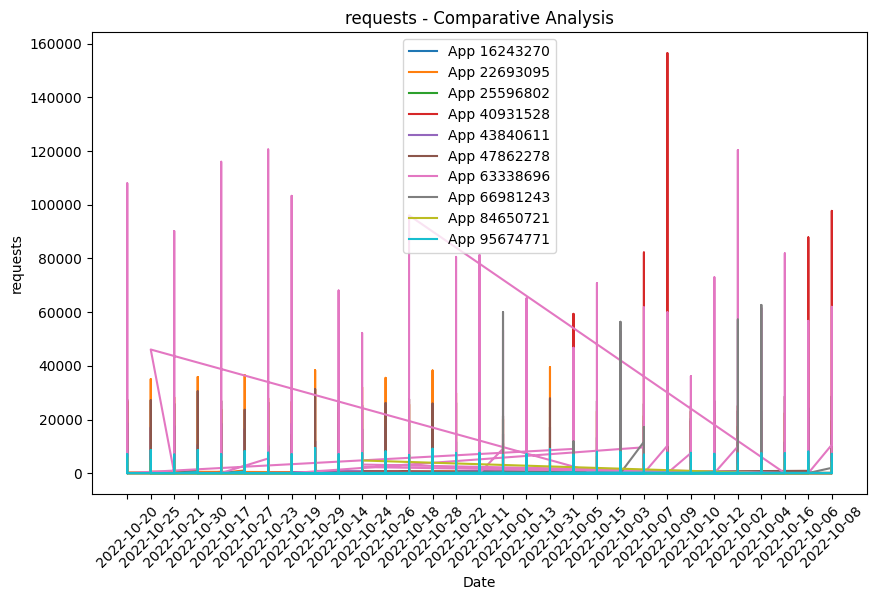

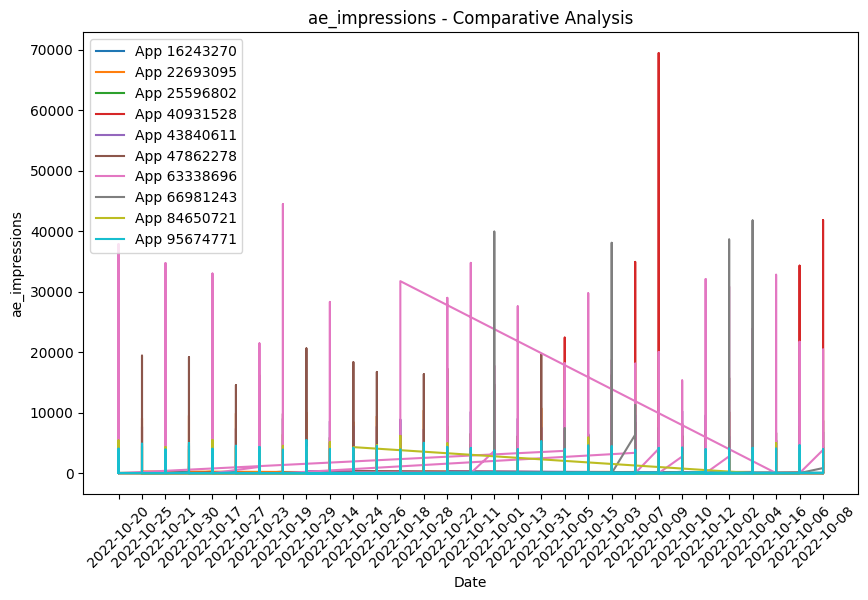

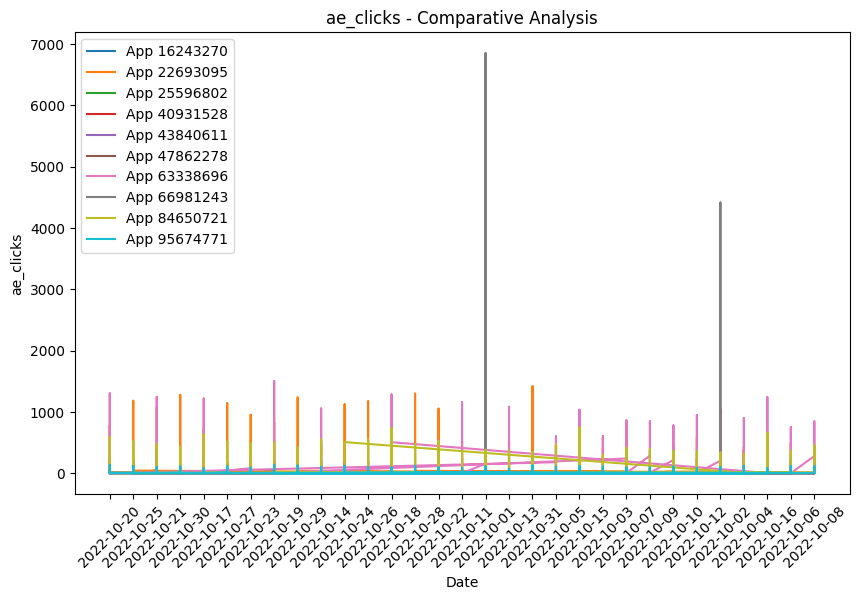

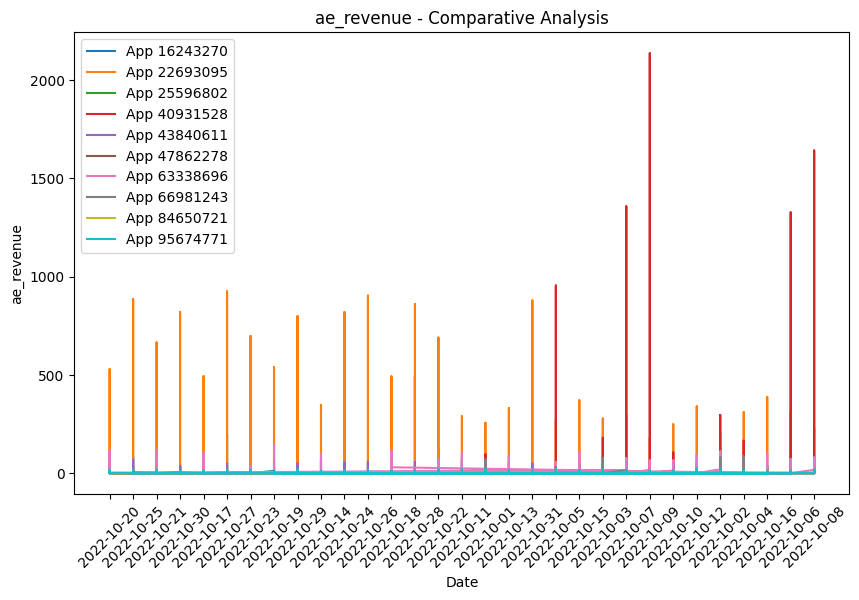

In [ ]:
# Comparative Analysis
comparison_metrics = ['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue']
for metric in comparison_metrics:
    plt.figure(figsize=(10, 6))
    for app_id, app_data in data.groupby('app_id'):
        plt.plot(app_data['date'], app_data[metric], label=f'App {app_id}')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.title(f'{metric} - Comparative Analysis')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

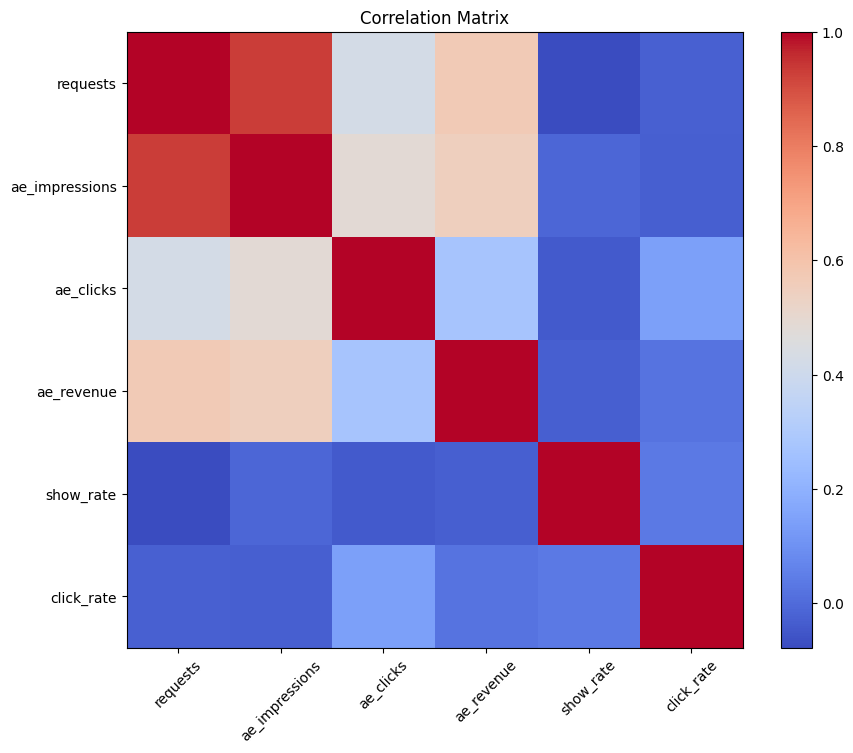

In [ ]:


# Correlation Analysis
correlation_matrix = data[metrics].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(metrics)), metrics, rotation=45)
plt.yticks(range(len(metrics)), metrics)
plt.title('Correlation Matrix')
plt.show()

             date  pub_id    app_id  ad_unit_code        country  requests  \
3      2022-10-20    1987  16243270   22832846593       Thailand      1006   
42     2022-10-25    1987  16243270   22832846593  United States       533   
61     2022-10-21    1987  16243270   22832846593       Thailand      1864   
62     2022-10-21    1987  16243270   22832846593  United States       839   
120    2022-10-27    1987  16243270   22832846593       Thailand       798   
...           ...     ...       ...           ...            ...       ...   
41038  2022-10-18      72  84650721   22674738906          India      5204   
41041  2022-10-18      72  84650721   22477733087          India      5116   
41251  2022-10-06      72  84650721   22477733087           Mali        26   
41303  2022-10-06      72  84650721   22674738894     Uzbekistan        74   
41552  2022-10-08      72  84650721   22477473702          India      4156   

       ae_responses  ae_impressions  ae_clicks  ae_revenue  ...

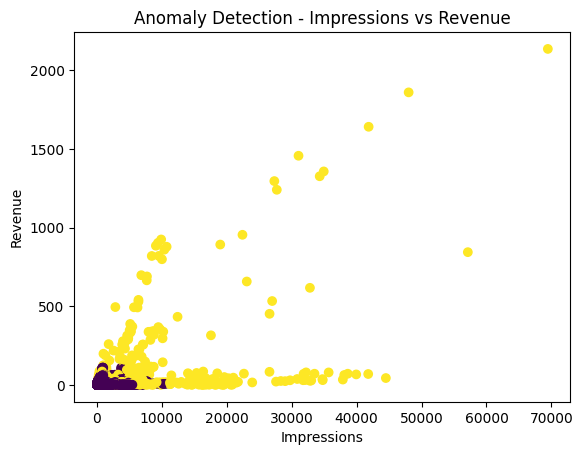

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['requests', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show_rate', 'click_rate']

# Standardize the feature values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)

# Identify anomalies as noise points (-1) in the clusters
anomaly_mask = dbscan.labels_ == -1

# Add anomaly column to the dataframe
data['anomaly'] = anomaly_mask

# Print the anomalies
print(data[data['anomaly']])

# Visualize the anomalies
plt.scatter(data['ae_impressions'], data['ae_revenue'], c=data['anomaly'], cmap='viridis')
plt.xlabel('Impressions')
plt.ylabel('Revenue')
plt.title('Anomaly Detection - Impressions vs Revenue')
plt.show()
